In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

In [3]:
stopWord=stopwords.words("english")
stopWord.remove('not')

In [4]:
df=pd.read_csv("messagesCollection",sep="\t",names=["label","message"])

In [5]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Feature Engineering

<AxesSubplot:xlabel='label', ylabel='count'>

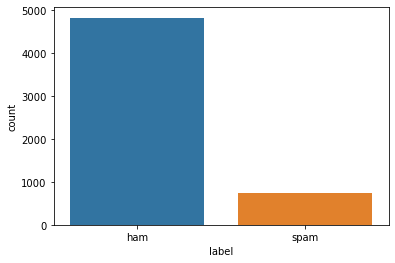

In [6]:
sns.countplot(df["label"])

In [7]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df["length"]=df["message"].apply(len)

In [9]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:>

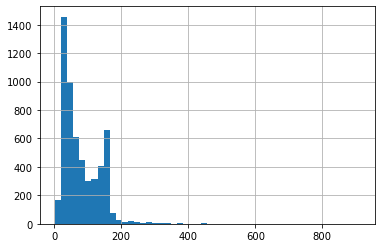

In [10]:
df["length"].hist(bins=50)

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

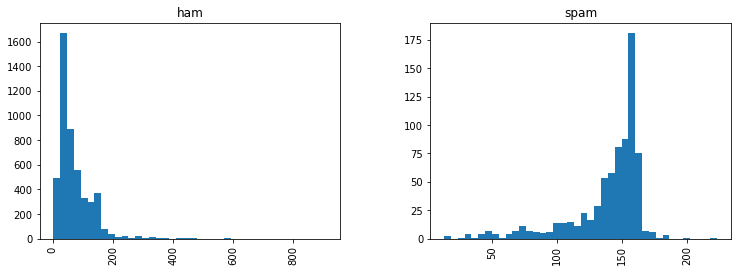

In [11]:
df.hist(column="length",by="label",bins=40,figsize=(12,4))# as we see here ham message length is approx 50 average and spam length is approx 150 average

In [12]:
def text_process(mess):
    withoutfun=[i for i in mess if i not in string.punctuation]
    withoutfun="".join(withoutfun)
    return [i for i in withoutfun.split() if i not in stopwords.words("english") ]

In [13]:
df["message"].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, I, dont, think, goes, usf, lives, around...
                              ...                        
5567    [This, 2nd, time, tried, 2, contact, u, U, £75...
5568             [Will, ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [The, guy, bitching, I, acted, like, id, inter...
5571                              [Rofl, Its, true, name]
Name: message, Length: 5572, dtype: object

# Traning a model

In [14]:
msg_train,msg_test,label_train,label_test=train_test_split(df["message"],df["label"],test_size=0.3)

In [15]:
pipeline=Pipeline([
    ("bow",CountVectorizer(analyzer=text_process)),
    ("tfi",TfidfTransformer()),
    ("classifer",MultinomialNB())
])#this is based on bag of word technique

In [16]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002D604167550>)),
                ('tfi', TfidfTransformer()), ('classifer', MultinomialNB())])

# Model Evaluation

In [19]:
predict=pipeline.predict(msg_test)

In [20]:
print(classification_report(label_test,predict))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1447
        spam       1.00      0.67      0.80       225

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672

